In [122]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 1. Create Simulation Data

In [253]:
sale = 1000
sales = []
for day in range(180):
    sales.append(sale)
    sale = sale + np.random.random() * 5 + np.sin(math.pi/180 * day * (360 / 7)) * 20 + np.random.normal() * 20
days = pd.date_range(start ='2021/1/1', periods=180, freq='D')

In [254]:
df_sales = pd.DataFrame(data={'sale': sales}, index=days)

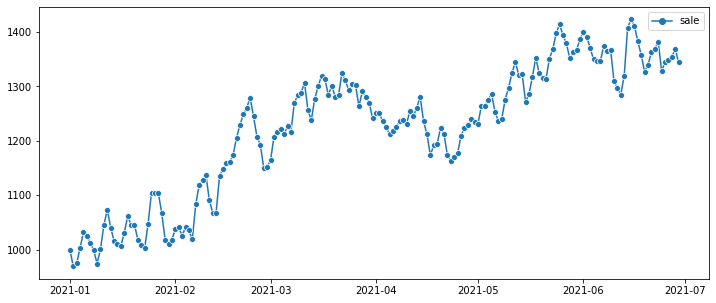

In [255]:
# df_sales.plot(figsize=(12,5), marker='.', title='Sales Trend')
plt.figure(figsize=(12,5))
sns.lineplot(data = df_sales, markers=True)
plt.show()

# 2. ewm, expanding, rolling

In [187]:
df_sales['sale_expanding'] = df_sales.sale.expanding().mean()
df_sales['sale_sma'] = df_sales.sale.rolling(window=7, min_periods=1).mean()
df_sales['sale_ewm'] = df_sales.sale.ewm(span=12, adjust=False).mean()

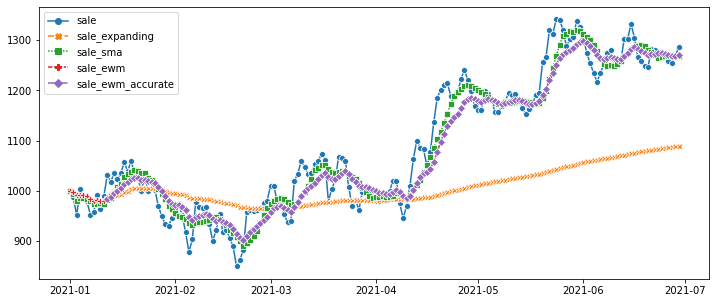

In [229]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df_sales, markers=True)
plt.show()

In [231]:
1/12*11/13*11/13

0.059664694280078895

In [236]:
2/101*((99/101)**12)

0.015576664706757058

In [210]:
df_sales['sale_ewm_accurate'] = np.nan

In [212]:
df_sales['sale_ewm_accurate'][11:] = pd.Series(df_sales['sale'][:12].mean()).append(df_sales['sale'][12:]).ewm(span=12, adjust=False).mean()

In [216]:
pd.Series(df_sales['sale'][:12].mean()).append(df_sales['sale'][12:]).ewm(span=12, adjust=False).mean()

0                       982.982414
2021-01-13 00:00:00     988.371552
2021-01-14 00:00:00     995.582585
2021-01-15 00:00:00     999.877979
2021-01-16 00:00:00    1005.326263
                          ...     
2021-06-25 00:00:00    1272.830990
2021-06-26 00:00:00    1270.565427
2021-06-27 00:00:00    1268.175221
2021-06-28 00:00:00    1268.066983
2021-06-29 00:00:00    1270.933169
Length: 169, dtype: float64

In [215]:
pd.Series(df_sales['sale'][:12].mean()).append(df_sales['sale'][12:])

0                       982.982414
2021-01-13 00:00:00    1018.011809
2021-01-14 00:00:00    1035.243266
2021-01-15 00:00:00    1023.502650
2021-01-16 00:00:00    1035.291821
                          ...     
2021-06-25 00:00:00    1265.558114
2021-06-26 00:00:00    1258.104829
2021-06-27 00:00:00    1255.029091
2021-06-28 00:00:00    1267.471671
2021-06-29 00:00:00    1286.697190
Length: 169, dtype: float64

In [228]:
df_sales[100:150]

,sale,sale_expanding,sale_sma,sale_ewm,sale_ewm_accurate
2021-04-11,1010.310094,983.266268,991.586768,990.042280,990.042278
2021-04-12,1063.423018,984.052118,1000.732922,1001.331624,1001.331623
2021-04-13,1100.164318,985.179421,1012.103280,1016.536654,1016.536653
2021-04-14,1086.178940,986.150570,1021.490528,1027.250852,1027.250851
2021-04-15,1082.496937,987.068155,1036.844093,1035.750250,1035.750249
2021-04-16,1049.140275,987.653741,1051.698067,1037.810254,1037.810253
2021-04-17,1077.367890,988.492191,1067.011639,1043.896044,1043.896043
2021-04-18,1136.173967,989.859615,1084.992192,1058.092647,1058.092647
2021-04-19,1185.279756,991.652460,1102.400298,1077.659895,1077.659894
2021-04-20,1200.020764,993.546717,1116.665504,1096.484644,1096.484644


In [219]:
988.672915*11/13 + 1018.011809*2/13

993.1865909999999

In [184]:
df_sales.sale[0]*3/5*3/5 + df_sales.sale[1]*2/5*3/5 + df_sales.sale[2]*2/5

977.3427459837612

In [182]:
df_sales.sale.ewm(span=4, adjust=False, min_periods=0).mean().head(10)

2021-01-01    1000.000000
2021-01-02     994.940453
2021-01-03     977.342746
2021-01-04     987.545686
2021-01-05     987.259561
2021-01-06     984.290986
2021-01-07     971.713012
2021-01-08     966.251520
2021-01-09     976.083219
2021-01-10     971.467169
Freq: D, Name: sale, dtype: float64

In [173]:
df_sales.sale.ewm(span=3, adjust=False, min_periods=5).mean().head(10)

2021-01-01           NaN
2021-01-02           NaN
2021-01-03           NaN
2021-01-04           NaN
2021-01-05    987.205430
2021-01-06    983.521777
2021-01-07    968.183913
2021-01-08    963.121598
2021-01-09    976.976183
2021-01-10    970.759638
Freq: D, Name: sale, dtype: float64

In [141]:
df_sales['sale_ewm'] = df_sales.sale.ewm(alpha=1/3, adjust=False).mean()

In [155]:
df_sales.sale.ewm(alpha=1/3, adjust=False).mean()

2021-01-01    1000.000000
2021-01-02     995.783711
2021-01-03     980.837869
2021-01-04     988.175278
2021-01-05     987.726977
                 ...     
2021-06-25    1271.536681
2021-06-26    1267.059397
2021-06-27    1263.049295
2021-06-28    1264.523420
2021-06-29    1271.914677
Freq: D, Name: sale, Length: 180, dtype: float64

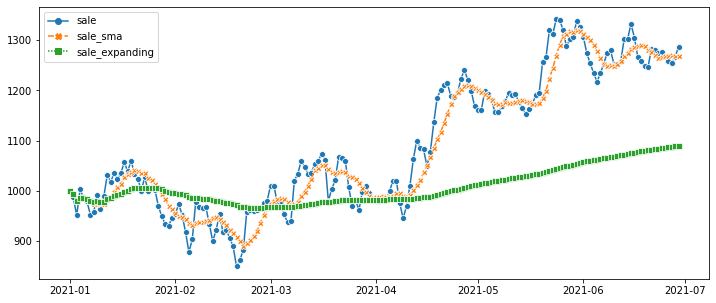

In [146]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df_sales, markers=True)
plt.show()

In [142]:
df_sales.head(10)

,sale,sale_sma,sale_expanding
2021-01-01,1000.000000,1000.000000,1000.000000
2021-01-02,987.351133,993.675567,993.675567
2021-01-03,950.946185,979.432439,979.432439
2021-01-04,1002.850095,985.286853,985.286853
2021-01-05,986.830375,985.595558,985.595558
2021-01-06,979.838124,984.635985,984.635985
2021-01-07,952.846050,980.094566,980.094566
2021-01-08,958.059282,974.103035,977.340156
2021-01-09,990.830768,974.600126,978.839112
2021-01-10,964.543093,976.542541,977.409510


In [145]:
df_sales['sale'][0:10].mean()

977.4095104719975

In [ ]:
hop_id = 16
item_id = 482
im = matrix.query(f"shop_id=={shop_id} & item_id=={item_id}")[['date_block_num', 'item_cnt_month']]
im['moving average'] = im['item_cnt_month'].ewm(halflife=1).mean()
im['expanding mean'] = im['item_cnt_month'].expanding().mean()
im['rolling 12 month mean'] = im['item_cnt_month'].rolling(window=12, min_periods=1).mean()
im = im.set_index('date_block_num')
ax = im.plot(figsize=(12,5), marker='.', title='Time series averaging methods')

https://rich01.com/what-is-moving-average-line/
https://stackoverflow.com/questions/45370666/what-are-pandas-expanding-window-functions
https://xuyu.in/807.html
https://www.investopedia.com/terms/e/ema.asp
https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
https://sciencing.com/calculate-exponential-moving-averages-8221813.html